# Project1

In [14]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [15]:
dataset = pd.read_csv("https://raw.githubusercontent.com/anyamanee/stroke_prediction/main/healthcare-dataset-stroke-data.csv")

In [16]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [17]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bm                   201
smoking_status         0
stroke                 0
dtype: int64

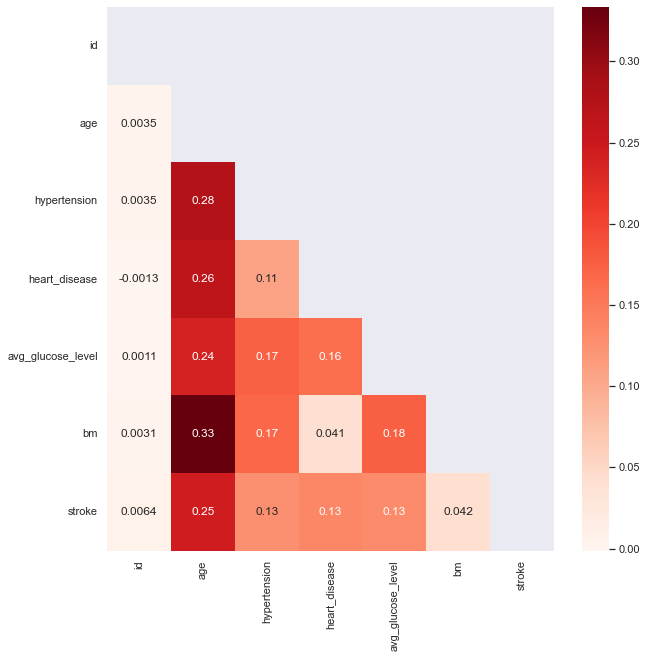

In [38]:
#Using Pearson Correlation
# Compute the correlation matrix
plt.figure(figsize=(10,10))
cor = dataset.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask =mask, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.009]

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


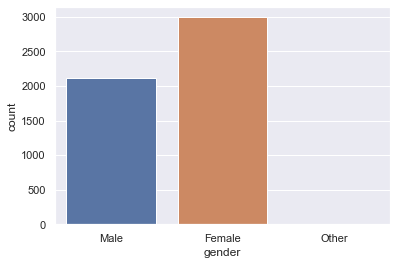

0    4612
1     498
Name: hypertension, dtype: int64


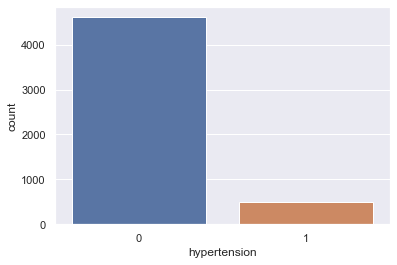

0    4834
1     276
Name: heart_disease, dtype: int64


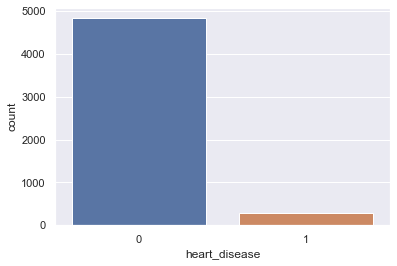

Yes    3353
No     1757
Name: ever_married, dtype: int64


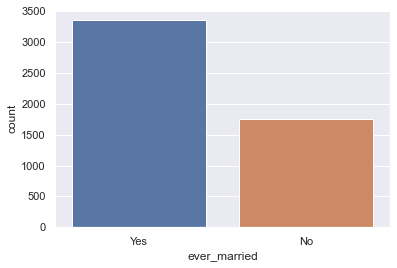

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


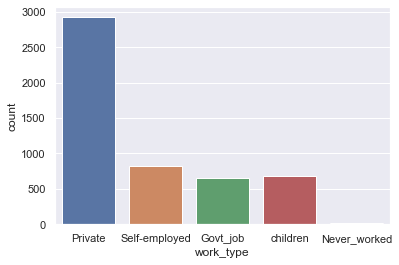

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


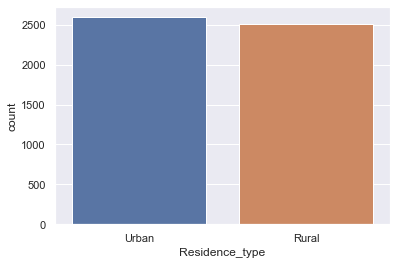

In [35]:
header = dataset.columns
lst_plot = header[[1,3,4,5,6,7]]
for xdata in lst_plot:
    print(dataset[xdata].value_counts())
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(data=dataset, x=xdata)
    plt.show()

C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


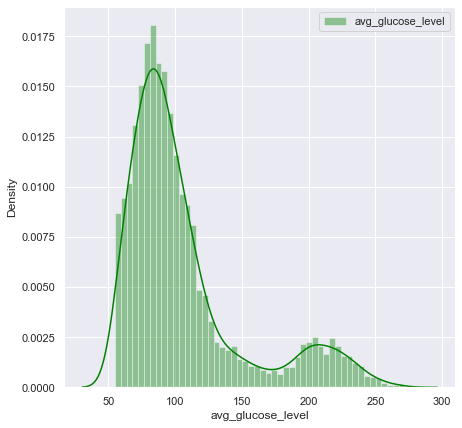

In [39]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


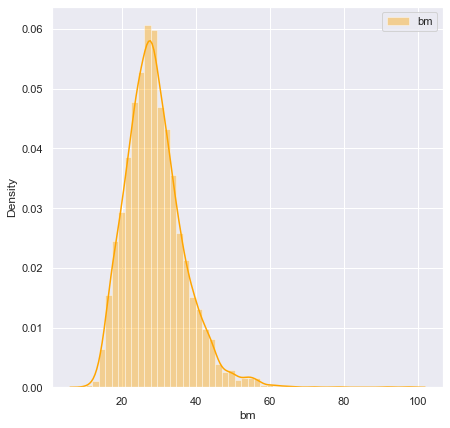

In [41]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bm, color="orange", label="bm", kde= True)
plt.legend()

In [ ]:
# Cleaning Data
df_mod = df
df_mod['bm'] = df_mod['bm'].fillna(df_mod['bm'].mean)

df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 5110 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 479.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


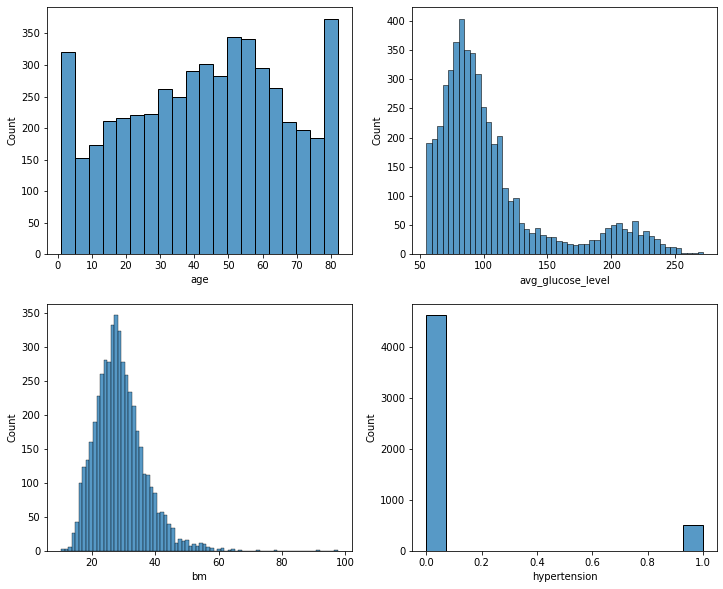

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(x='age',data = df_mod , ax=ax[0][0])
sns.histplot(x='avg_glucose_level',data = df_mod, ax=ax[0][1])
sns.histplot(x='bm',data = df_mod, ax=ax[1][0])
sns.histplot(x='hypertension',data = df_mod, ax=ax[1][1])


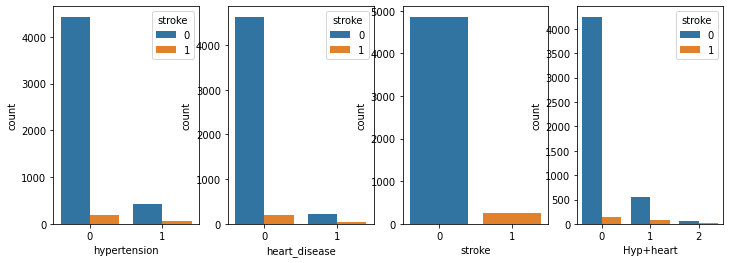

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(12, 4))
sns.countplot(x="hypertension",hue ="stroke",data = df_mod, ax=ax1)
sns.countplot(x="heart_disease",hue ="stroke", data = df_mod, ax=ax2)
sns.countplot(x="stroke",  data = df_mod, ax=ax3)
sns.countplot(x="Hyp+heart",hue ="stroke",data = df_mod, ax=ax4)

In [ ]:
df_mod['Hyp+heart'] = df_mod['hypertension'] + df_mod['heart_disease'] 

In [ ]:
# Data Encoding: 
#1. Categorical

#2. Label



In [ ]:
# Splitting the dataset into the Training set and Test set

In [ ]:
# Handling Imbalance data using SMOTE

In [ ]:
# Model Selection

In [ ]:
# Keras ANN

[1] https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy
[2] https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5
[3]https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes